# MinMaxScaler and Dummies

Data preparation and preprocessing

Historical data that was selected for solving the problem must be transformed into a format suitable for machine learning. Since model performance and therefore the quality of received insights depend on the quality of data, the primary aim is to make sure all data points are presented using the same logic, and the overall dataset is free of inconsistencies.


In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn import model_selection

In [161]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBRegressor, XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score, precision_score, f1_score, classification_report

In [162]:
file = '/Users/tshields/Documents/GitHub/Churn/Data/churn_data_cleaned.csv'

In [163]:
df = pd.read_csv(file, index_col=0)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Drop customerID
The column adds not value to making predictions

In [164]:
df.drop(['customerID'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


# Separating Categorical Data

In [165]:
cat = df.drop(columns=['tenure', 'MonthlyCharges', 'TotalCharges'])
cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            7032 non-null   object
 1   SeniorCitizen     7032 non-null   object
 2   Partner           7032 non-null   object
 3   Dependents        7032 non-null   object
 4   PhoneService      7032 non-null   object
 5   MultipleLines     7032 non-null   object
 6   InternetService   7032 non-null   object
 7   OnlineSecurity    7032 non-null   object
 8   OnlineBackup      7032 non-null   object
 9   DeviceProtection  7032 non-null   object
 10  TechSupport       7032 non-null   object
 11  StreamingTV       7032 non-null   object
 12  StreamingMovies   7032 non-null   object
 13  Contract          7032 non-null   object
 14  PaperlessBilling  7032 non-null   object
 15  PaymentMethod     7032 non-null   object
 16  Churn             7032 non-null   object
dtypes: object(17)


# Encoding Target Variable

In [166]:
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)
df['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

## Using get_dummies on categorical features

In [167]:
dummies = pd.get_dummies(df)
dummies.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [168]:

y = df['Churn']
X = dummies.drop(columns = ['Churn'])

# Normalising numeric values using MinMaxScaler

In [169]:


features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features
X.head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.000000,0.115423,0.001275,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.464789,0.385075,0.215867,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.014085,0.354229,0.010310,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.619718,0.239303,0.210241,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.014085,0.521891,0.015330,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [170]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

## Splitting the data

In [171]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)

## Comparing default models

#### Because this is a churn problem using an imbalanced dataset, recall is the best metric to use when comparing alogrithms.

In [172]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('RFC', RandomForestClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('SVC', SVC(random_state = 1)))
models.append(('AB', AdaBoostClassifier()))
models.append(("GB", GradientBoostingClassifier()))
models.append(('CB', CatBoostClassifier(verbose=False)))


In [173]:
results = []
names = []
scoring = 'recall'
for name, model in models:
    kfold = model_selection.KFold(n_splits=3, random_state=None)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/Users/tshields/opt/anaconda3/envs/Springboard/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tshields/opt/anaconda3/envs/Springboard/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

LR: 0.546981 (0.011318)
RFC: 0.474028 (0.003993)
DT: 0.480533 (0.016308)
SVC: 0.491863 (0.009667)
AB: 0.547648 (0.017347)
GB: 0.521273 (0.008693)
CB: 0.516309 (0.010461)


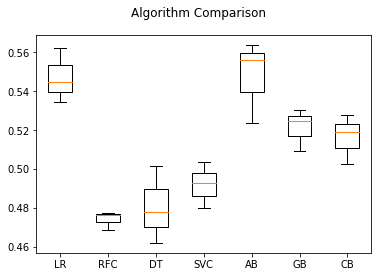

In [174]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [175]:
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

model = AdaBoostClassifier()
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='recall')
# execute the grid search
grid_result = grid_search.fit(X_train, y_train)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.542004 using {'learning_rate': 1.0, 'n_estimators': 10}
0.000000 (0.000000) with: {'learning_rate': 0.0001, 'n_estimators': 10}
0.000000 (0.000000) with: {'learning_rate': 0.0001, 'n_estimators': 50}
0.000000 (0.000000) with: {'learning_rate': 0.0001, 'n_estimators': 100}
0.000000 (0.000000) with: {'learning_rate': 0.0001, 'n_estimators': 500}
0.000000 (0.000000) with: {'learning_rate': 0.001, 'n_estimators': 10}
0.000000 (0.000000) with: {'learning_rate': 0.001, 'n_estimators': 50}
0.000000 (0.000000) with: {'learning_rate': 0.001, 'n_estimators': 100}
0.000000 (0.000000) with: {'learning_rate': 0.001, 'n_estimators': 500}
0.000000 (0.000000) with: {'learning_rate': 0.01, 'n_estimators': 10}
0.000000 (0.000000) with: {'learning_rate': 0.01, 'n_estimators': 50}
0.000000 (0.000000) with: {'learning_rate': 0.01, 'n_estimators': 100}
0.379626 (0.038084) with: {'learning_rate': 0.01, 'n_estimators': 500}
0.000000 (0.000000) with: {'learning_rate': 0.1, 'n_estimators': 10}
0.384876 

In [176]:
adaOpt =  AdaBoostClassifier(learning_rate= 1.0, n_estimators= 10)

In [177]:
modelOpt = adaOpt.fit(X_train, y_train)
y_pred = modelOpt.predict(X_test)

In [178]:
y_pred_prob = modelOpt.predict_proba(X_test)
lr_probs = y_pred_prob[:,1]
print("\nClassification report:\n", classification_report(y_test, y_pred))


Classification report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86      1285
           1       0.64      0.56      0.60       473

    accuracy                           0.80      1758
   macro avg       0.74      0.72      0.73      1758
weighted avg       0.79      0.80      0.79      1758



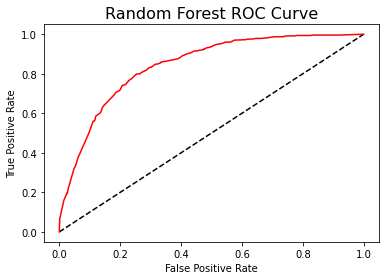

In [180]:
from sklearn.metrics import roc_curve
y_rfpred_prob = adaOpt.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();